DATA ANALYSIS FOR SALARIES OF SAN FRANCISCO EMPLOYEE DATASET

In [2]:
#IMPORTING NECCESARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
#LOADING THE DATASET
dt = pd.read_csv("C:/Users/DELL/Downloads/Total.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_20244\2427742852.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv("C:/Users/DELL/Downloads/Total.csv")


In [4]:
dt.head()  # Display the first few rows of the dataset

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


In [6]:
dt.shape

(312882, 9)

FEATURE ENGINEERING

In [7]:
#CHANGING DATA TYPES OF THE COLUMNS 
c_name = ['BasePay','OvertimePay','OtherPay','Benefits']
for i in c_name:
    dt[i] = pd.to_numeric(dt[i], errors='coerce')

In [8]:
dt.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312276 non-null  float64
 3   OvertimePay       312881 non-null  float64
 4   OtherPay          312881 non-null  float64
 5   Benefits          276722 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


DISCRIPTIVE STATISTICAL ANALYSIS

In [10]:
dt.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312276.000000,312881.000000,312881.000000,276722.000000,312882.000000,312882.000000,312882.000000
mean,69808.257496,5668.929393,3460.694974,25016.917292,78802.645788,100928.339777,2014.625303
std,45376.929428,12745.655309,7387.263120,15089.077103,53230.758542,66485.186495,2.290899
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2011.000000
25%,35722.365000,0.000000,0.000000,12729.762500,38803.000000,48955.072500,2013.000000
50%,67710.450000,0.000000,728.000000,28327.330000,74908.790000,100011.290000,2015.000000
75%,99312.302500,5223.120000,3958.680000,35268.162500,111386.897500,142376.300000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


In [11]:
dt.isnull().sum() # Check for missing values in the dataset

EmployeeName            0
JobTitle                0
BasePay               606
OvertimePay             1
OtherPay                1
Benefits            36160
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [12]:
#RECORDS WITH THE NULL VALUESS
dt[dt.isnull().any(axis=1)]  

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
110527,Nereida Vega,Senior Clerk,NaN,0.00,5.56,0.00,5.56,5.56,2013
110528,Timothy E Gibson,Police Officer 3,NaN,0.00,0.00,-2.73,0.00,-2.73,2013
110529,Mark E Laherty,Police Officer 3,NaN,0.00,0.00,-8.20,0.00,-8.20,2013
110530,David P Kucia,Police Officer 3,NaN,0.00,0.00,-33.89,0.00,-33.89,2013


HERE, BENEFITS COLUMNS HAVING  NULL VALUES SINGNIFIES - NO BENEFIT 

In [13]:
#FILLING NULL VALUES OF BENEFITS COLUMNS WITH 0
dt.fillna({'Benefits': 0}, inplace=True)
dt.isnull().sum()  # Check for missing values again

EmployeeName          0
JobTitle              0
BasePay             606
OvertimePay           1
OtherPay              1
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
dtype: int64

In [14]:
dt[dt.isnull().any(axis=1)] # Display rows with missing values

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
81391,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.00,149934.11,149934.11,2013
84506,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.00,110485.41,131264.41,2013
84960,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.00,8841.48,120000.00,128841.48,2013
90525,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.00,106079.31,106079.31,2013
90786,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013
...,...,...,...,...,...,...,...,...,...
110527,Nereida Vega,Senior Clerk,NaN,0.0,5.56,0.00,5.56,5.56,2013
110528,Timothy E Gibson,Police Officer 3,NaN,0.0,0.00,-2.73,0.00,-2.73,2013
110529,Mark E Laherty,Police Officer 3,NaN,0.0,0.00,-8.20,0.00,-8.20,2013
110530,David P Kucia,Police Officer 3,NaN,0.0,0.00,-33.89,0.00,-33.89,2013


RECORDS HAVING NAN VALUES IN BASEPAY FIELD ALSO SIGNIFIES 0 BASEPAY

In [15]:
#FILLING 0 TO ALL RECORDS HAVING NAN VALUES IN BASEPAY FIELD
dt.fillna({'BasePay': 0}, inplace=True)
dt.isnull().sum()  # Check for missing values again

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         1
OtherPay            1
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [16]:
dt[dt.isnull().any(axis=1)]  # Display rows with missing values

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
229000,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2016


THIS RECORD HAS ZERO INFORMATION. SO, WE GONNA DROP IT

In [17]:
dt.dropna(inplace=True)  # Drop rows with any remaining NaN values
dt.isnull().sum()  # Check for missing values again

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

EDA

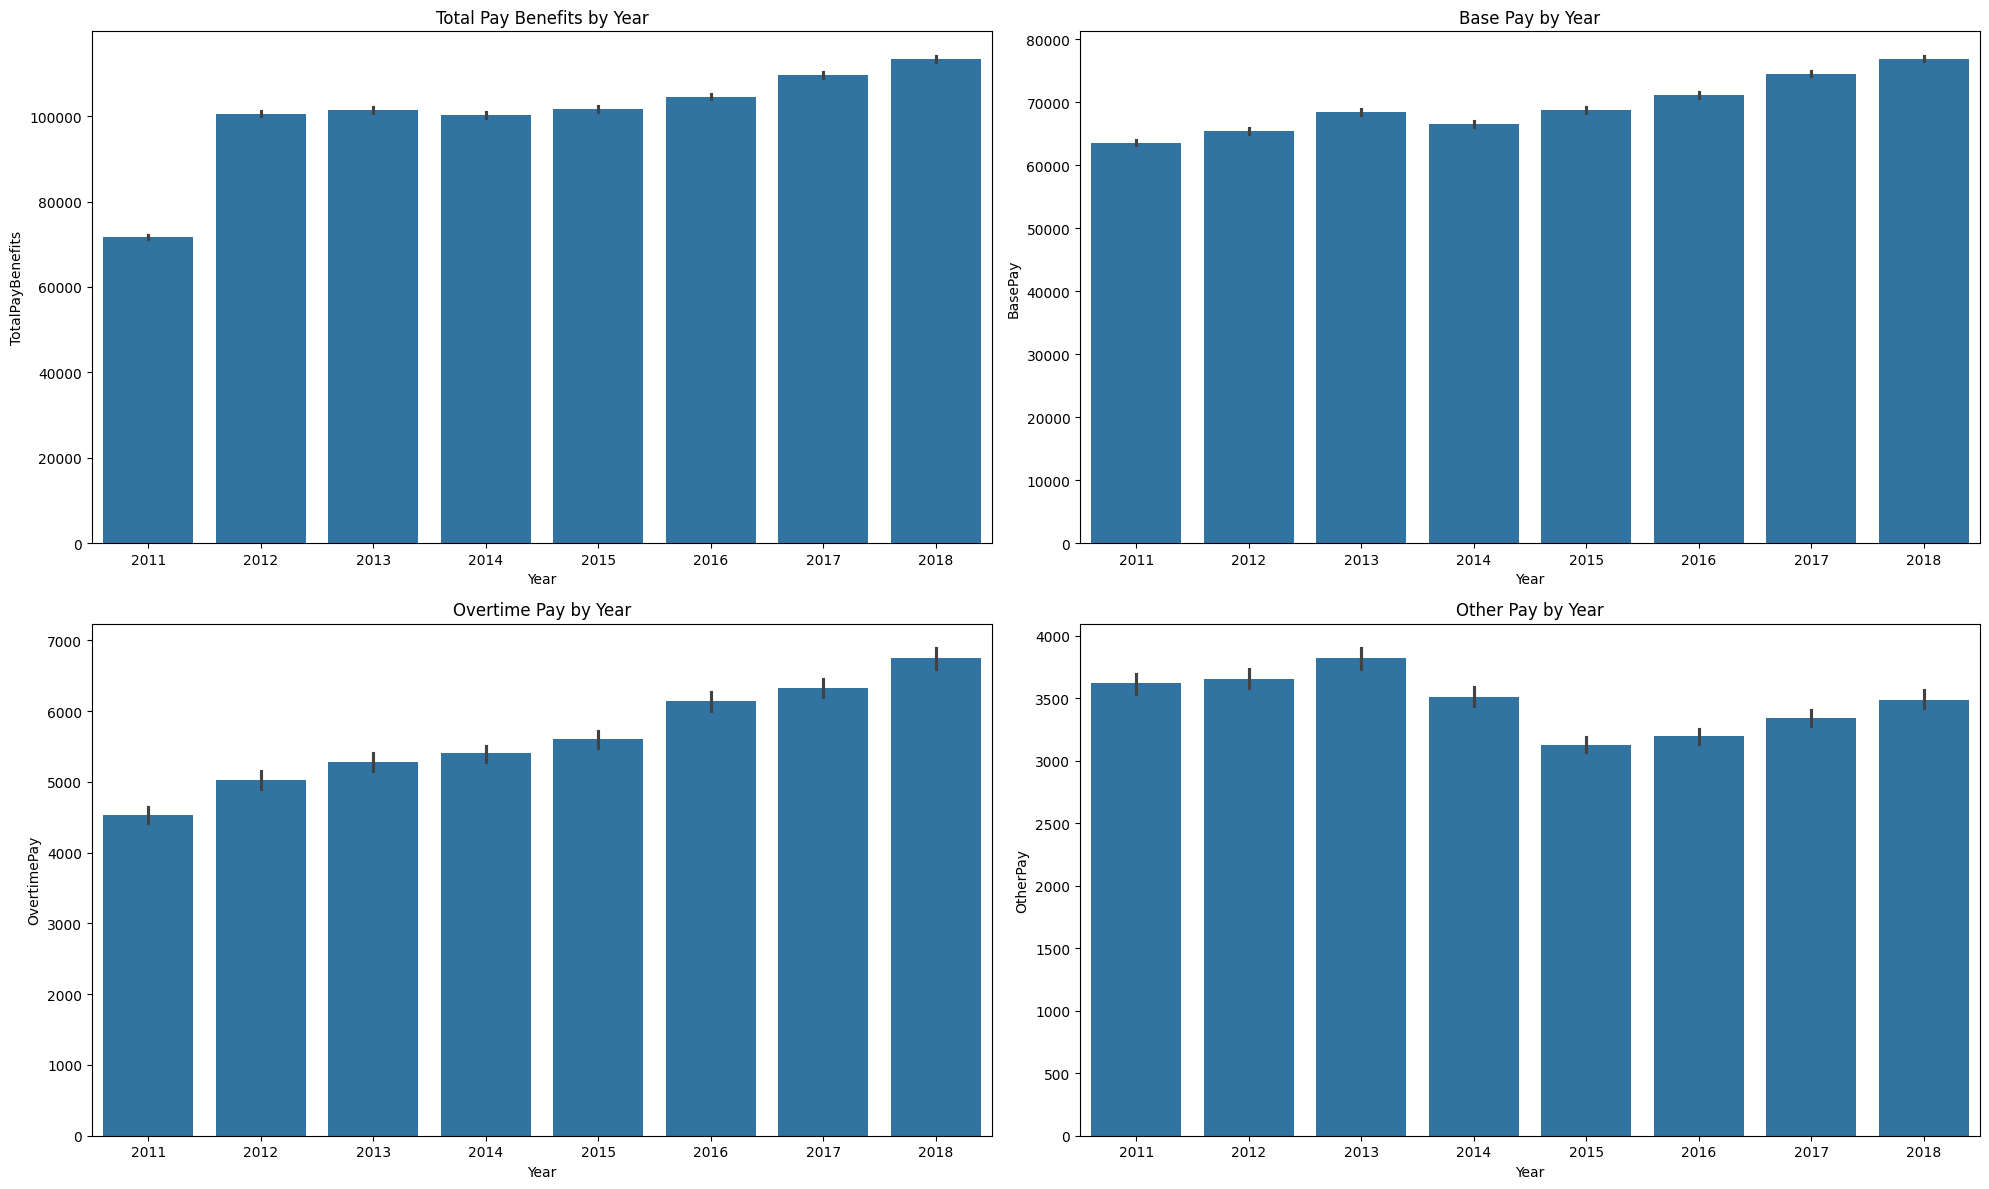

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

sns.barplot(data=dt, x='Year', y='TotalPayBenefits', ax=axs[0, 0])
axs[0, 0].set_title('Total Pay Benefits by Year')

sns.barplot(data=dt, x='Year', y='BasePay', ax=axs[0, 1])
axs[0, 1].set_title('Base Pay by Year')

sns.barplot(data=dt, x='Year', y='OvertimePay', ax=axs[1, 0])
axs[1, 0].set_title('Overtime Pay by Year')

sns.barplot(data=dt, x='Year', y='OtherPay', ax=axs[1, 1])
axs[1, 1].set_title('Other Pay by Year')

plt.tight_layout()
plt.show()

EACH PAY (EXCLUDING OTHERPAY ) HAS INCREASED BY THE YEAR , AND OVERALL PAY THAT IS TOTALPAY HAS INCREASED BY THE YEARS 

In [36]:
#UNIQUEJOB TITLES
unique_job_titles = dt['JobTitle'].unique()
print(f"Number of unique job titles: {len(unique_job_titles)}")

Number of unique job titles: 2285


In [45]:
#JOBTITLES WITH THE MOST TAOTAL PAY BENEFITS IN DESCENDING ORDER
dt.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False).head(10)

JobTitle
Chief Investment Officer                          611728.638000
Physician Administrator, DPH                      454471.806667
Managing Director                                 438767.559091
Chief, Fire Department                            417767.857143
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Gen Mgr, Public Trnsp Dept                        389126.942857
Assistant Chief of Police                         387003.872500
Administrator, DPH                                374311.562857
Dept Head V                                       365736.799048
Chief of Police                                   360199.826667
Name: TotalPayBenefits, dtype: float64